-----------
Initializing structure...
time for choose_chunkdivision = 7.10487e-05 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 40
time for set_epsilon = 3.93685 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=50.0)

Meep progress: 1.3875000000000002/50.0 = 2.8% done in 4.0s, 141.2s to go
on time step 111 (time=1.3875), 0.0362612 s/step
Meep progress: 2.875/50.0 = 5.8% done in 8.0s, 131.9s to go
on time step 230 (time=2.875), 0.0337503 s/step
Meep progress: 4.2875000000000005/50.0 = 8.6% done in 12.1s, 128.7s to go
on time step 343 (time=4.2875), 0.0355923 s/step
Meep progress: 5.625/50.0 = 11.2% done in 16.1s, 127.1s to go
on time step 450 (time=5.625), 0.0377855 s/step
Meep progress: 6.9/50.0 = 13.8% done in 20.1s, 125.8s to go
on time step 552 (time=6.9), 0.0394227 s/step
Meep progress: 8.2375/50.0 = 16.5% done in 24.1s, 122.4s to go
on time step 659 (time=8.2375), 0.0374145 s/step
Meep progress: 9.5625/50.0 = 19.1% done in 28.1s, 119.0s to go
on time step 765 (time=9.5625), 0.0377488 s/step
Meep progress: 10.8/50.0 = 21.6% done in 32.1s, 116.7s to go
on time step 864 (time=10.8), 0.0404995 s/step
Meep progress: 12.100000000000001/50.0 = 24.2% done in 36.2s, 113.3s to go
on time step 968 (time=1

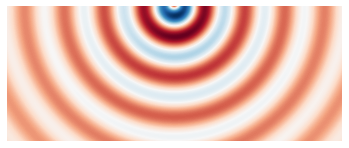

In [2]:
import meep as mp
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

resolution = 40 # pixels/μm

cell_size = mp.Vector3(50, 50,0)

pml_layers = [mp.PML(thickness=1.0,direction=mp.Y)]

fcen = 0.42 # center frequency of CW source (wavelength is 1 μm)

tilt_angle = math.radians(-10) # angle of tilted beam
k = mp.Vector3(y=1).rotate(mp.Vector3(z=1),tilt_angle).scale(fcen)

sigma = 0.2 # beam width

def gaussian_beam(sigma, k, x0):
    def _gaussian_beam(x):
        return cmath.exp(1j*2*math.pi*k.dot(x-x0)-(x-x0).dot(x-x0)/(2*sigma**2))
    return _gaussian_beam

src_pt = mp.Vector3(y=4)
sources = [mp.Source(src=mp.ContinuousSource(fcen, fwidth=0.2*fcen),
                     component=mp.Ez,
                     center=src_pt,
                     size=mp.Vector3(20),
                     amp_func=gaussian_beam(sigma,k,src_pt))]

sim = mp.Simulation(cell_size=cell_size,
                    sources=sources,
                    k_point=k,
                    boundary_layers=pml_layers,
                    resolution=resolution)

non_pml_vol = mp.Volume(center=mp.Vector3(), size=mp.Vector3(20,8,0))
sim.run(until=50)

ez_data = sim.get_array(vol=non_pml_vol, component=mp.Ez)

plt.figure()
plt.imshow(np.flipud(np.transpose(np.real(ez_data))), interpolation='spline36', cmap='RdBu')
plt.axis('off')
plt.show()

In [60]:
import meep as mp
from meep.materials import fused_quartz
import numpy as np
import math
import matplotlib.pyplot as plt

resolution = 200  # pixels/μm

dpml = 1.0
sz = 10+2*dpml
cell_size = mp.Vector3(z=sz)
pml_layers = [mp.PML(dpml)]

wvl_min = 0.380
wvl_max = 0.8
fmin = 1/wvl_max
fmax = 1/wvl_min
fcen = 0.5*(fmax+fmin)
df = fmax-fmin
nfreq = 50

sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df), component=mp.Ex, center=mp.Vector3(z=-0.5*sz+dpml))]

sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions=1,
                    resolution=resolution)

refl_fr = mp.FluxRegion(center=mp.Vector3(z=-0.25*sz))
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(), 1e-9))

empty_flux = mp.get_fluxes(refl)
empty_data = sim.get_flux_data(refl)
sim.reset_meep()

geometry = [mp.Block(mp.Vector3(mp.inf,mp.inf,0.5*sz), center=mp.Vector3(z=0.25*sz), material=fused_quartz)]

sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    dimensions=1,
                    resolution=resolution)

refl = sim.add_flux(fcen, df, nfreq, refl_fr)
sim.load_minus_flux_data(refl, empty_data)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(), 1e-9))

refl_flux = mp.get_fluxes(refl)
R_meep = -1*np.divide(refl_flux,empty_flux)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000120878 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 12 with resolution 200
time for set_epsilon = 0.00057888 s
-----------
field decay(t = 50.0025): 0.2501872564385881 / 0.2501872564385881 = 1.0
field decay(t = 100.0025): 4.014104558879271e-15 / 0.2501872564385881 = 1.6044400566279797e-14
run 0 finished at t = 100.0025 (40001 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000118017 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 12 with resolution 200
     block, center = (0,0,3)
          size (1e+20,1e+20,6)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.000742912 s
lorentzian susceptibility: frequency=0.101049, gamma=0
lorentzian susceptibility: frequency=8.60279, gamma=0
lorentzian susceptibility: frequency=14.619, gamma=0
-----------
field decay(t = 50.0025): 0.1651926407284

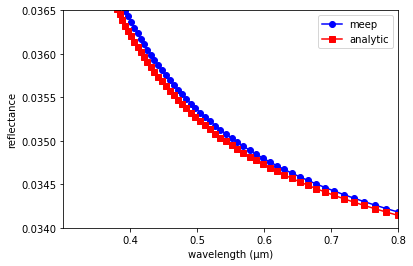

In [61]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1,freqs)

eps_quartz = lambda l: 1+0.6961663*math.pow(l,2)/(pow(l,2)-pow(0.0684043,2))+0.4079426*pow(l,2)/(pow(l,2)-pow(0.1162414,2))+0.8974794*pow(l,2)/(pow(l,2)-pow(9.896161,2))
R_fresnel = lambda l: math.pow(math.fabs(1-math.sqrt(eps_quartz(l)))/(1+math.sqrt(eps_quartz(l))),2)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls,R_meep,'bo-',label='meep')
plt.plot(wvls,R_analytic,'rs-',label='analytic')
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.3, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4,0.9,0.1)])
plt.legend(loc='upper right')
plt.show()

In [95]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

resolution = 10 # pixels/um

sx = 16  # size of cell in X direction
sy = 32  # size of cell in Y direction
cell = mp.Vector3(sx,sy,0)

dpml = 1.0
pml_layers = [mp.PML(dpml)]

In [96]:
pad = 4  # padding distance between waveguide and cell edge
w = 2    # width of waveguide

In [97]:
wvg_xcen =  0.5*(sx-w-2*pad)  # x center of horiz. wvg
wvg_ycen = -0.5*(sy-w-2*pad)  # y center of vert. wvg

In [106]:
geometry = [mp.Block(size=mp.Vector3(mp.inf,w,mp.inf),
                     center=mp.Vector3(0,wvg_ycen,0),
                     material=mp.Medium(epsilon=20))]

In [107]:
fcen = 0.15  # pulse center frequency
df = 0.1    # pulse width (in frequency)
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ez,
                     center=mp.Vector3(-0.5*sx+dpml,wvg_ycen,0),
                     size=mp.Vector3(0,w,0))]

-----------
Initializing structure...
time for choose_chunkdivision = 7.89165e-05 s
Working in 2D dimensions.
Computational cell is 16 x 32 x 0 with resolution 10
     block, center = (0,-11,0)
          size (1e+20,2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (20,20,20)
time for set_epsilon = 0.0574398 s
-----------


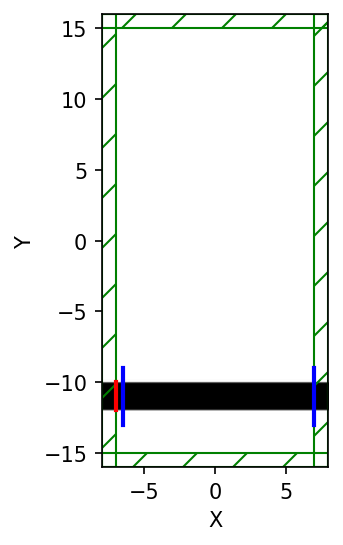

In [108]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

nfreq = 1000  # number of frequencies at which to compute flux

# reflected flux
refl_fr = mp.FluxRegion(center=mp.Vector3(-0.5*sx+dpml+0.5,wvg_ycen,0), size=mp.Vector3(0,2*w,0))                            
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

# transmitted flux
tran_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml,wvg_ycen,0), size=mp.Vector3(0,2*w,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

plt.figure(dpi=150)
sim.plot2D()
plt.show()

In [109]:
pt = mp.Vector3(0.5*sx-dpml-0.5,wvg_ycen)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

# for normalization run, save flux fields data for reflection plane
straight_refl_data = sim.get_flux_data(refl)

field decay(t = 50.050000000000004): 1.5965466114285118e-09 / 1.5965466114285118e-09 = 1.0
field decay(t = 100.05000000000001): 0.00214113154260982 / 0.00214113154260982 = 1.0
field decay(t = 150.1): 0.01955058477602335 / 0.01955058477602335 = 1.0
field decay(t = 200.15): 0.0003412952121400208 / 0.01955058477602335 = 0.017457033436594795
field decay(t = 250.20000000000002): 1.2914737971554202e-09 / 0.01955058477602335 = 6.605806485846252e-08
run 0 finished at t = 250.20000000000002 (5004 timesteps)


In [110]:
# save incident power for transmission plane
straight_tran_flux = mp.get_fluxes(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 7.70092e-05 s
Working in 2D dimensions.
Computational cell is 16 x 32 x 0 with resolution 10
     block, center = (-2,-11,0)
          size (12,2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3,2,0)
          size (2,28,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0626621 s
-----------
field decay(t = 50.050000000000004): 1.6227584295902004e-10 / 1.6227584295902004e-10 = 1.0
field decay(t = 100.05000000000001): 2.0107757451244913e-06 / 2.0107757451244913e-06 = 1.0
field decay(t = 150.1): 0.00015666707166349972 / 0.00015666707166349972 = 1.0
field decay(t = 200.15): 0.0017681260031954895 / 0.0017681260031954895 = 1.0
field decay(t = 250.20000000000002): 0.001765534035792683 / 0.0017681260031954895 = 0.9985340595646905
field decay(t = 300.2): 4.86300

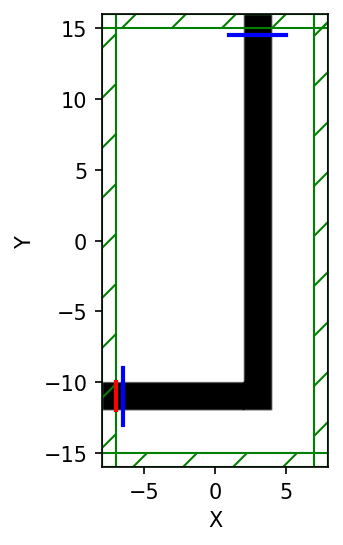

In [111]:
sim.reset_meep()

geometry = [mp.Block(mp.Vector3(sx-pad,w,mp.inf), center=mp.Vector3(-0.5*pad,wvg_ycen), material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(w,sy-pad,mp.inf), center=mp.Vector3(wvg_xcen,0.5*pad), material=mp.Medium(epsilon=12))]

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

# reflected flux
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

tran_fr = mp.FluxRegion(center=mp.Vector3(wvg_xcen,0.5*sy-dpml-0.5,0), size=mp.Vector3(2*w,0,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

# for normal run, load negated fields to subtract incident from refl. fields
sim.load_minus_flux_data(refl, straight_refl_data)

pt = mp.Vector3(wvg_xcen,0.5*sy-dpml-0.5)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

bend_refl_flux = mp.get_fluxes(refl)
bend_tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(refl)

plt.figure(dpi=150)
sim.plot2D()
plt.show()

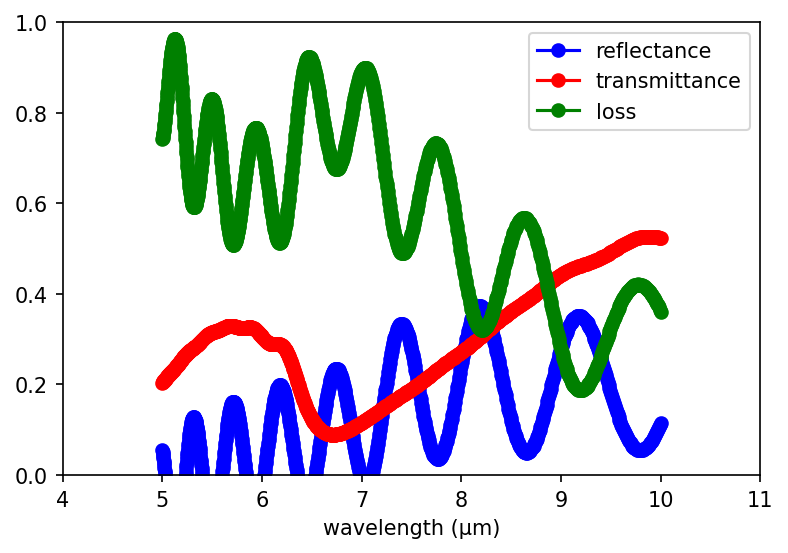

In [114]:
wl = []
Rs = []
Ts = []
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-bend_refl_flux[i]/straight_tran_flux[i])
    Ts = np.append(Ts,bend_tran_flux[i]/straight_tran_flux[i])    

if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance')
    plt.plot(wl,Ts,'ro-',label='transmittance')
    plt.plot(wl,1-Rs-Ts,'go-',label='loss')
    plt.axis([4.0, 11.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()